In [157]:
import numpy as np # линейная алгебра
import pandas as pd # обработка данных, CSV afqk I/O (например pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')

In [158]:
df = pd.read_csv('ICE_702_RVP_SH-800_TVP.csv', sep=';')
df.head()

,Frequency,Azimuth,S-param,Amplitude,Phase,Unnamed: 5
0,9.30,-90.0,S34,-80.6585,-160.9600,NaN
1,9.31,-90.0,S34,-80.6618,163.8490,NaN
2,9.32,-90.0,S34,-80.6590,129.6650,NaN
3,9.33,-90.0,S34,-80.6734,95.2192,NaN
4,9.34,-90.0,S34,-80.5155,60.7176,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 6 columns):
Frequency     18462 non-null float64
Azimuth       18462 non-null float64
S-param       18462 non-null object
Amplitude     18462 non-null float64
Phase         18462 non-null float64
Unnamed: 5    0 non-null float64
dtypes: float64(5), object(1)
memory usage: 865.5+ KB


In [160]:
# df.columns[:]
df.drop('Unnamed: 5', axis = 'columns', inplace = True)
# df.drop(df.columns[5], axis = 'columns', inplace = True)

In [161]:
df.head()

,Frequency,Azimuth,S-param,Amplitude,Phase
0,9.30,-90.0,S34,-80.6585,-160.9600
1,9.31,-90.0,S34,-80.6618,163.8490
2,9.32,-90.0,S34,-80.6590,129.6650
3,9.33,-90.0,S34,-80.6734,95.2192
4,9.34,-90.0,S34,-80.5155,60.7176


In [162]:
# df[df.columns[1]].unique()
print(df['Azimuth'].unique())
print(df['Frequency'].unique())
print(df['S-param'].unique())

[-90. -89. -88. -87. -86. -85. -84. -83. -82. -81. -80. -79. -78. -77.
 -76. -75. -74. -73. -72. -71. -70. -69. -68. -67. -66. -65. -64. -63.
 -62. -61. -60. -59. -58. -57. -56. -55. -54. -53. -52. -51. -50. -49.
 -48. -47. -46. -45. -44. -43. -42. -41. -40. -39. -38. -37. -36. -35.
 -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21.
 -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.
   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.
  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.]
[9.3  9.31 9.32 9.33 9.34 9.35 9.36 9.37 9.38 9.39 9.4  9.41 9.42 9.43
 9.44 9.45

In [192]:
df_neg90_S34 = df[df['Azimuth'] == -90.][df['S-param'] == 'S34']
df_neg90_S34.head()

,Frequency,Azimuth,S-param,Amplitude,Phase,LinAmpl
0,9.30,-90.0,S34,-80.6585,-160.9600,0.000093
1,9.31,-90.0,S34,-80.6618,163.8490,0.000093
2,9.32,-90.0,S34,-80.6590,129.6650,0.000093
3,9.33,-90.0,S34,-80.6734,95.2192,0.000093
4,9.34,-90.0,S34,-80.5155,60.7176,0.000094


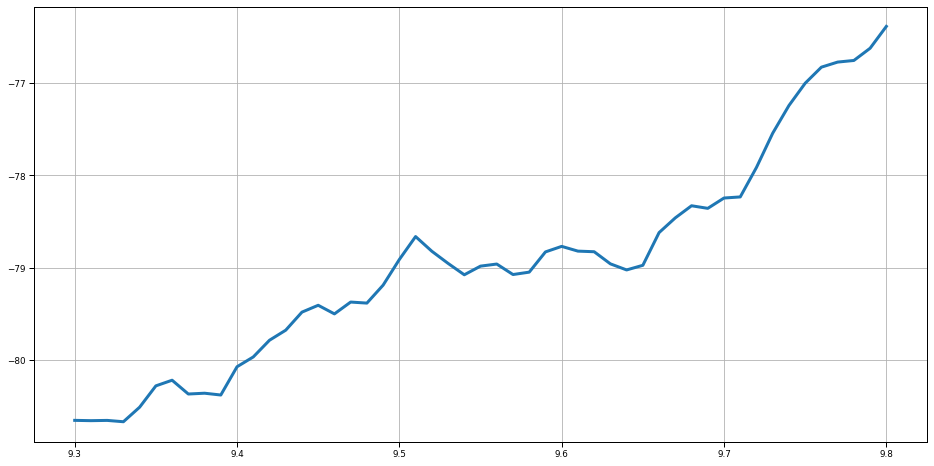

In [174]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(df_neg90_S34["Frequency"], df_neg90_S34["Amplitude"], linewidth=3);
ax.grid()

In [206]:
df_f95_S34 = df[df['Frequency'] == 9.5][df['S-param'] == 'S34']

In [207]:
df['LinAmpl'] = 10**(df['Amplitude']/20)
df['AzimuthRad'] = df['Azimuth'] * np.pi/180
df.head()

,Frequency,Azimuth,S-param,Amplitude,Phase,LinAmpl,NormLinAmpl,AzimuthRad
0,9.30,-90.0,S34,-80.6585,-160.9600,0.000093,0.040598,-1.570796
1,9.31,-90.0,S34,-80.6618,163.8490,0.000093,0.040583,-1.570796
2,9.32,-90.0,S34,-80.6590,129.6650,0.000093,0.040596,-1.570796
3,9.33,-90.0,S34,-80.6734,95.2192,0.000093,0.040528,-1.570796
4,9.34,-90.0,S34,-80.5155,60.7176,0.000094,0.041272,-1.570796


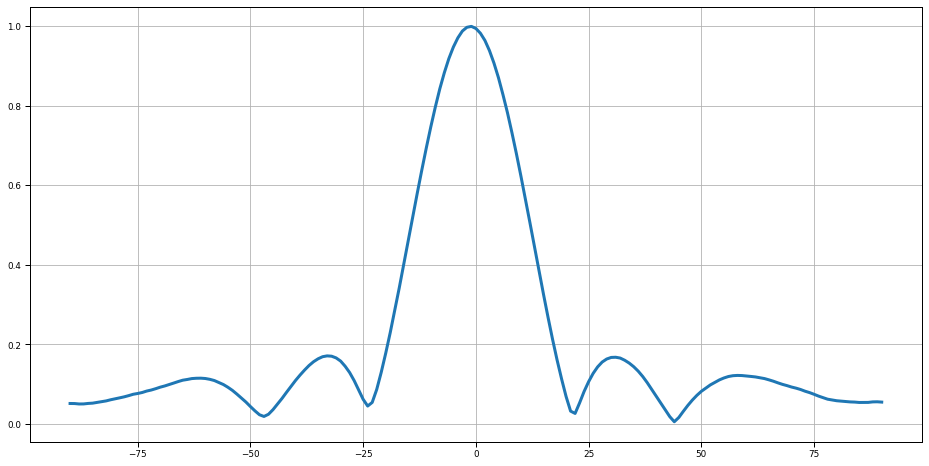

In [208]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(df_f95_S34["Azimuth"], df_f95_S34["LinAmpl"]/df_f95_S34["LinAmpl"].max(), linewidth=3);
ax.grid()

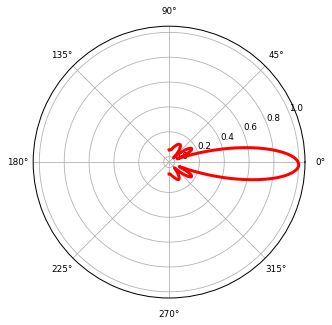

In [212]:
fig = plt.figure()
ax1 = fig.add_subplot(111, polar=True)   
ax1.plot(df_f95_S34["AzimuthRad"], df_f95_S34["LinAmpl"]/df_f95_S34["LinAmpl"].max(), 'r', linewidth = 3)
fig.set_figheight(5)
# fig.set_figwidth(5)
plt.show()